In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
# !pip install geopandas

# Movies
Link to the dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies <br>
Data that is contained in the datset comes from IMDb platform which is the most popular database on infromations related to films. The csv file used in this notebook contains 6820 movies (220 movies per year, 1986-2016).

In [11]:
df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


- **budget**: the budget of a movie. Some movies don't have this information so value is 0
- **company**: the production company
- **country**: country of origin
- **director**: the director
- **genre**: main genre of the movie.
- **gross**: revenue of the movie
- **name**: name of the movie
- **rating**: rating of the movie (R, PG, etc.)
- **released**: release date (YYYY-MM-DD)
- **runtime**: duration of the movie
- **score**: IMDb user rating
- **votes**: number of user votes
- **star**: main actor/actress
- **writer**: writer of the movie
- **year**: year of release

In [12]:
categorical_df = df[['company', 'director', 'genre', 'name', 'country', 'writer', 'star', 'rating']]
numerical_df = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]

numerical_df.describe()
# df['budget'].isna().sum()# it returns 2171 (meaning that 2171 movies does not have information about budget)

,budget,gross,runtime,score,votes,year
count,5.497000e+03,7.479000e+03,7664.000000,7665.000000,7.665000e+03,7668.000000
mean,3.558988e+07,7.850054e+07,107.261613,6.390411,8.810850e+04,2000.405451
std,4.145730e+07,1.657251e+08,18.581247,0.968842,1.633238e+05,11.153508
min,3.000000e+03,3.090000e+02,55.000000,1.900000,7.000000e+00,1980.000000
25%,1.000000e+07,4.532056e+06,95.000000,5.800000,9.100000e+03,1991.000000
50%,2.050000e+07,2.020576e+07,104.000000,6.500000,3.300000e+04,2000.000000
75%,4.500000e+07,7.601669e+07,116.000000,7.100000,9.300000e+04,2010.000000
max,3.560000e+08,2.847246e+09,366.000000,9.300000,2.400000e+06,2020.000000


> Notes:<br>
> - variables from `numerical_df` are purely numerical because we can do mathematical operations on them.
> - variables like `company`, `director`, `writer`, or `star` are categorical because assign a movie to a specific person (or company) responsible for its creation. Other variables like `genre`, `country` or `rating` are obvious when it comes to assiging it to categorical group.
> - information returned by `describe` function are rather meaningful, but it is worth noting that column budget is not complete because many movies (especially older) didn't provide information about their budget

## Correlations


Text(0, 0.5, 'revenue')

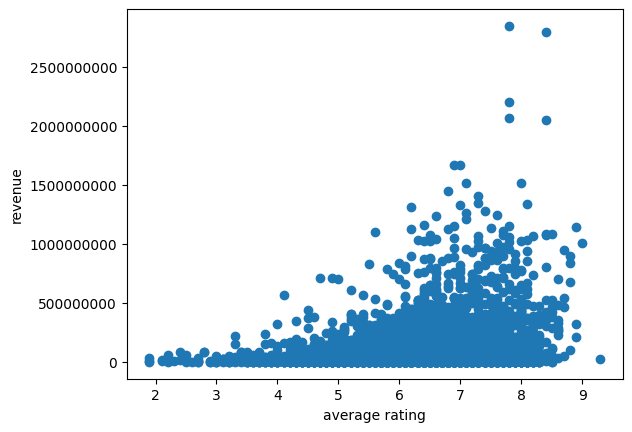

In [13]:
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(df['score'], df['gross'])
plt.xlabel('average rating')
plt.ylabel('revenue')

<Figure size 1200x800 with 0 Axes>

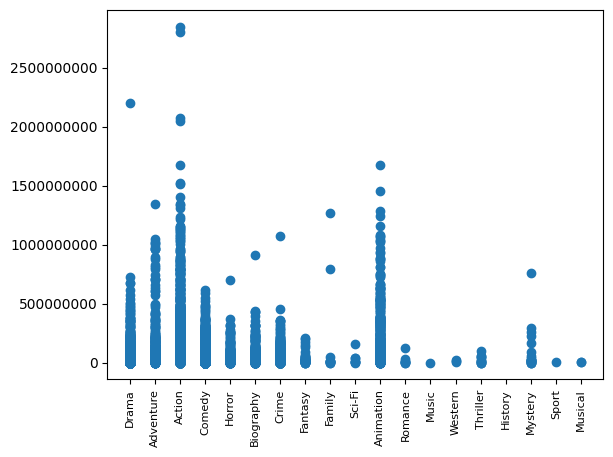

<Figure size 1200x800 with 0 Axes>

In [14]:
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(df['genre'], df['gross'])
plt.xticks(rotation=90, fontsize=8)
plt.figure(figsize=(12, 8))

Text(0, 0.5, 'budget')

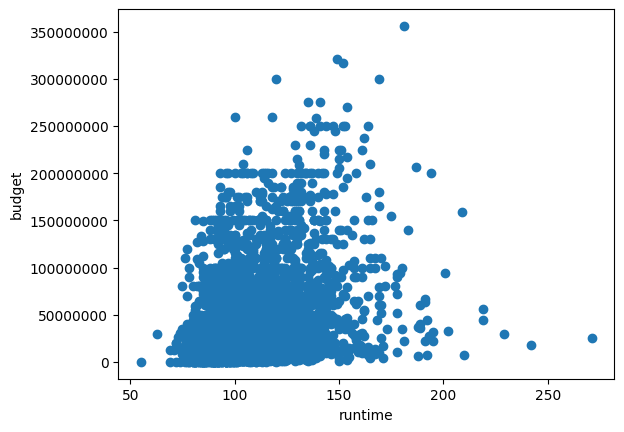

In [15]:
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(df['runtime'], df['budget'])
plt.xlabel('runtime')
plt.ylabel('budget')

## Interesting facts about movies


/tmp/ipykernel_44496/602936614.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<Axes: >

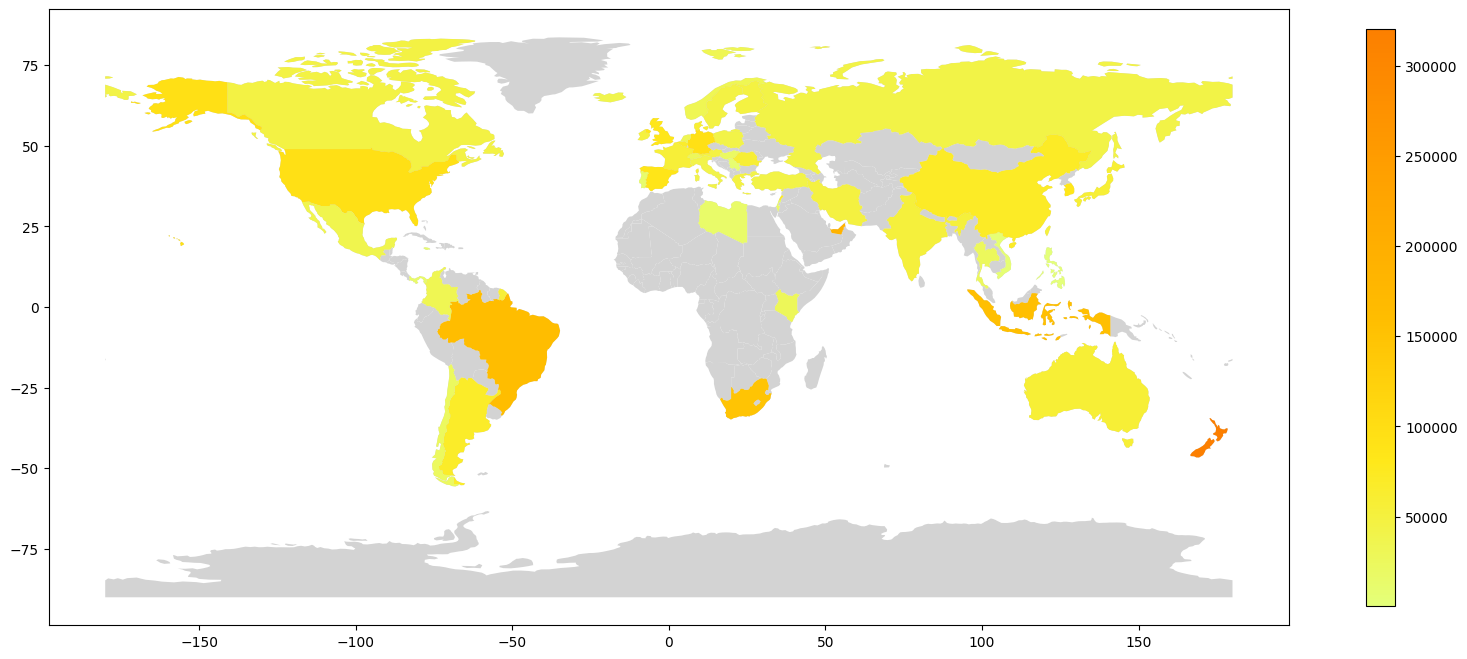

In [16]:
df['country'] = df['country'].replace('United States', 'United States of America')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'name', 'geometry']]
world.rename(columns={'name': 'country'}, inplace=True)

popularity_df = df[['country','votes']]
popularity_df = popularity_df.groupby('country').mean().reset_index()

merged = pd.merge(world, popularity_df, on='country')
fig, ax = plt.subplots(figsize=(20,15))
world.plot(figsize=(20,15), color='lightgray', ax=ax)
merged.plot(column="votes", legend=True, legend_kwds={'shrink': 0.5}, cmap='Wistia', figsize=(20,15), ax=ax)

Text(0, 0.5, 'popularity')

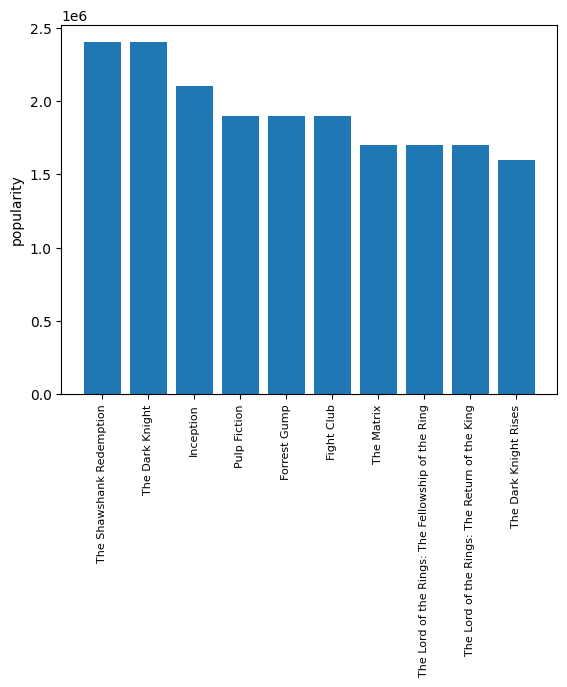

In [17]:
most_popular_movies = df.nlargest(10, 'votes')
plt.bar(most_popular_movies['name'], most_popular_movies['votes'])
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('popularity')

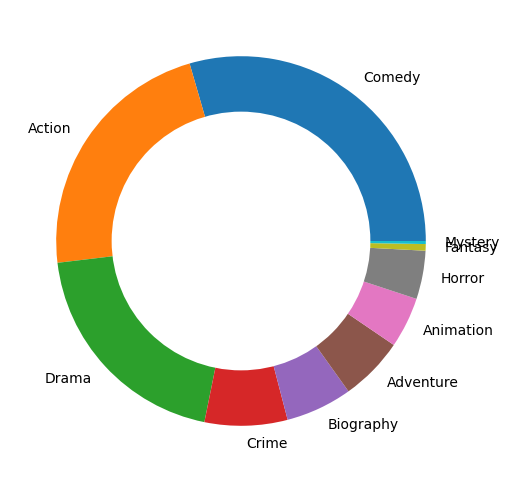

In [18]:
popular_genres_df = df['genre'].value_counts().reset_index(name='count')
popular_genres_df = popular_genres_df[popular_genres_df['count'] >= 20]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(popular_genres_df['count'], labels=popular_genres_df['genre'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_patch(centre_circle)